### Simplest DNN

In [1]:
import torch
from train_dnn import prepare_dataloader

configs = {
    "window_duration": 0.04,
    "window_shift": 0.02,
    "n_frames": 499,
    "n_mels": 26,
    "n_feature": 13,
    "feature_type": "mfcc",
    "learing_rate": 0.001,
    "batch_size": 256,
    "p_dropout": 0,
    "model_type": "dnn"
}
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

train_loader, dev_loader, eval_loader = prepare_dataloader(configs)
print("Data preparing done")

(3008, 6487)
(379, 6487)
(330, 6487)
train:	3008, 12
dev:	379, 2
eval:	330, 2
Data preparing done


---
DNN1-512

In [3]:
from train_dnn import train
from dnn_model import DNN1

model = DNN1(configs["n_frames"]*configs["n_feature"], 10).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0007
modelpath = "/data/lujd/algorithm2022/model/dnn2/"
train_loss_list, train_acc_list, dev_loss_list, dev_acc_list = train(
                                                                    model, train_loader, dev_loader,
                                                                    configs, device, modelpath, early_stop=3)

model preparing done
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([192, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([123, 6487])
Epoch-1: train loss=2.2483, dev accurary=0.3245 | Model saving...
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
feature size: torch.Size([256, 6487])
f

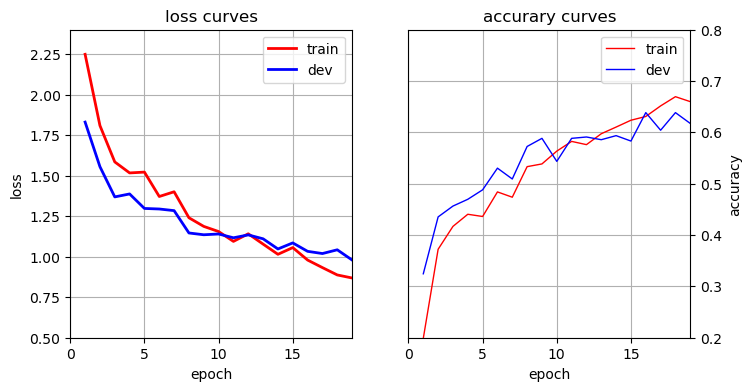

In [18]:
from utils import plot_loss_acc_curve
plot_loss_acc_curve(train_loss_list, train_acc_list, dev_loss_list, dev_acc_list)

In [11]:
from train_dnn import train

model = DNN1(configs["n_frames"]*configs["n_feature"], 10).to(device)
print("model preparing done")

configs["learing_rate"] = 0.001
modelpath = "/data/lujd/algorithm2022/model/dnn_1e-3/"
train_loss_list, train_acc_list, dev_loss_list, dev_acc_list = train(
                                                                    model, train_loader, dev_loader,
                                                                    configs, device, modelpath, early_stop=5)

model preparing done
Epoch-1: train loss=2.2618, dev accurary=0.4195 | Model saving...
Epoch-2: train loss=1.9464, dev accurary=0.4116
Epoch-3: train loss=1.7041, dev accurary=0.4433 | Model saving...
Epoch-4: train loss=1.5052, dev accurary=0.4459 | Model saving...
Epoch-5: train loss=1.5854, dev accurary=0.4828 | Model saving...
Epoch-6: train loss=1.4289, dev accurary=0.4934 | Model saving...
Epoch-7: train loss=1.3792, dev accurary=0.4960 | Model saving...
Epoch-8: train loss=1.2933, dev accurary=0.5435 | Model saving...
Epoch-9: train loss=1.3007, dev accurary=0.5356
Epoch-10: train loss=1.1903, dev accurary=0.5567 | Model saving...
Epoch-11: train loss=1.1779, dev accurary=0.5488
Epoch-12: train loss=1.1575, dev accurary=0.5699 | Model saving...
Epoch-13: train loss=1.0966, dev accurary=0.5752 | Model saving...
Epoch-14: train loss=1.0739, dev accurary=0.5805 | Model saving...
Epoch-15: train loss=0.9925, dev accurary=0.5989 | Model saving...
Epoch-16: train loss=0.9727, dev accu

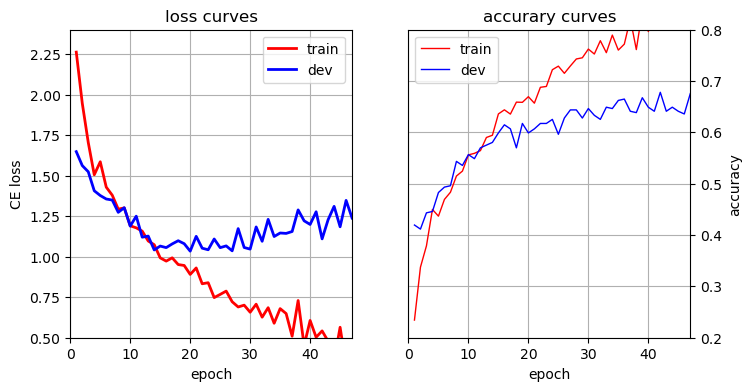

In [12]:
from utils import plot_loss_acc_curve
plot_loss_acc_curve(train_loss_list, train_acc_list, dev_loss_list, dev_acc_list)

In [25]:
from train_dnn import eval_step
from dnn_model import DNN1

test_device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
test_model = DNN1(configs["n_frames"]*configs["n_feature"], 10).to(test_device)
modelpath = "/data/lujd/algorithm2022/model/dnn_1e-3/"
modelname = "model_221227_ep12.pkl"
test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
print("model preparing done")

eval_loss, eval_acc = eval_step(test_model, eval_loader, configs, test_device)
print(f"test accurary: {eval_acc}")

model preparing done
test accurary: 0.45151515151515154


---
DNN2-768

In [45]:
from train_dnn import train
from dnn_model import DNN2

p_dropout = 0.3
model = DNN2(configs["n_frames"]*configs["n_feature"], 10, p=p_dropout).to(device)
print("model preparing done")

configs["learing_rate"] = 0.001
modelpath = "/data/lujd/algorithm2022/model/dnn2_1e-3_dropout_3e-1/"
train_loss_list, train_acc_list, dev_loss_list, dev_acc_list = train(
                                                                    model, train_loader, dev_loader,
                                                                    configs, device, modelpath, early_stop=5)

model preparing done
Epoch-1: train loss=2.3897, dev accurary=0.3852 | Model saving...
Epoch-2: train loss=1.7965, dev accurary=0.4406 | Model saving...
Epoch-3: train loss=1.6870, dev accurary=0.4459 | Model saving...
Epoch-4: train loss=1.5668, dev accurary=0.4565 | Model saving...
Epoch-5: train loss=1.4589, dev accurary=0.5040 | Model saving...
Epoch-6: train loss=1.5019, dev accurary=0.5356 | Model saving...
Epoch-7: train loss=1.3819, dev accurary=0.5541 | Model saving...
Epoch-8: train loss=1.3474, dev accurary=0.5303
Epoch-9: train loss=1.2862, dev accurary=0.5462
Epoch-10: train loss=1.3122, dev accurary=0.5515
Epoch-11: train loss=1.2585, dev accurary=0.5356
Epoch-12: train loss=1.2687, dev accurary=0.5646 | Model saving...
Epoch-13: train loss=1.2012, dev accurary=0.6069 | Model saving...
Epoch-14: train loss=1.1373, dev accurary=0.5726
Epoch-15: train loss=1.1534, dev accurary=0.5937
Epoch-16: train loss=1.1668, dev accurary=0.5435
Epoch-17: train loss=1.0947, dev accurary=

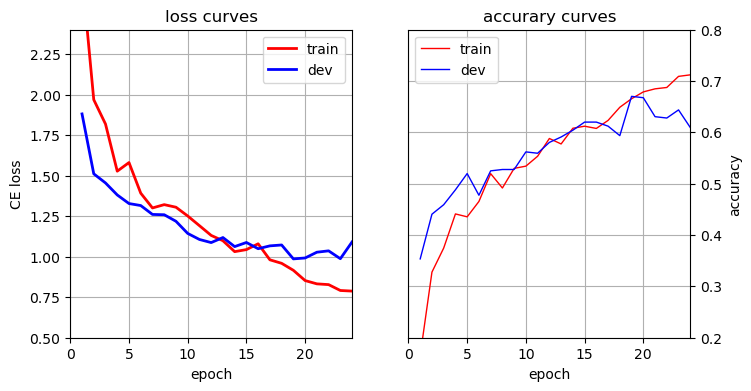

In [33]:
from utils import plot_loss_acc_curve
plot_loss_acc_curve(train_loss_list, train_acc_list, dev_loss_list, dev_acc_list)

In [53]:
from train_dnn import eval_step
from dnn_model import DNN2

test_device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
test_model = DNN2(configs["n_frames"]*configs["n_feature"], 10, p=p_dropout).to(test_device)
modelname = "model_221227_ep24.pkl"
test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
print("model preparing done")

eval_loss, eval_acc, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
print(f"test accurary: {eval_acc}")

FileNotFoundError: [Errno 2] No such file or directory: '/data/lujd/algorithm2022/model/dnn2_1e-3_dropout_3e-1/model_221227_ep24.pkl'

dnn2_5e-3/ep13 -> 0.493

dnn2_1e-3/ep19 -> 0.497

dnn2_1e-3/ep14 -> 0.5

dnn2_1e-3_dropout0.5/ep18 -> 0.503

In [58]:
from train_dnn import train
from dnn_model import DNN2

model = DNN2(configs["n_frames"]*configs["n_feature"], 10).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/fbanks/dnn2/"
train_loss_list, train_acc_list, dev_loss_list, dev_acc_list = train(
                                                                    model, train_loader, dev_loader,
                                                                    configs, device, modelpath, early_stop=5)

model preparing done
Epoch-1: train loss=3.2127, dev accurary=0.2005 | Model saving...
Epoch-2: train loss=2.3088, dev accurary=0.2718 | Model saving...
Epoch-3: train loss=2.2650, dev accurary=0.2902 | Model saving...
Epoch-4: train loss=1.9662, dev accurary=0.3404 | Model saving...
Epoch-5: train loss=1.9824, dev accurary=0.3456 | Model saving...
Epoch-6: train loss=2.0129, dev accurary=0.4116 | Model saving...
Epoch-7: train loss=1.8614, dev accurary=0.4274 | Model saving...
Epoch-8: train loss=1.9071, dev accurary=0.4116
Epoch-9: train loss=1.6799, dev accurary=0.4380 | Model saving...
Epoch-10: train loss=1.9007, dev accurary=0.4195
Epoch-11: train loss=1.6206, dev accurary=0.4538 | Model saving...
Epoch-12: train loss=1.6925, dev accurary=0.4565 | Model saving...
Epoch-13: train loss=1.6810, dev accurary=0.4512
Epoch-14: train loss=1.7367, dev accurary=0.5013 | Model saving...
Epoch-15: train loss=1.7339, dev accurary=0.4116
Epoch-16: train loss=1.6400, dev accurary=0.4565
Epoch-

In [62]:
from train_dnn import eval_step
from dnn_model import DNN2

test_device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
test_model = DNN2(configs["n_frames"]*configs["n_feature"], 10).to(test_device)
modelname = "model_221227_ep14.pkl"
test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
print("model preparing done")

eval_loss, eval_acc, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
print(f"test accurary: {eval_acc}")

model preparing done
test accurary: 0.47878787878787876


---
DNN3-768+batchnorm

In [24]:
from train_dnn import train
from dnn_model import DNN3

model = DNN3(configs["n_frames"]*configs["n_feature"], 10).to(device)
print("model preparing done")

configs["learing_rate"] = 0.001
modelpath = "/data/lujd/algorithm2022/model/dnn3/"
train_loss_list, train_acc_list, dev_loss_list, dev_acc_list = train(
                                                                    model, train_loader, dev_loader,
                                                                    configs, device, modelpath, early_stop=5)

model preparing done
Epoch-1: train loss=1.3827, dev accurary=0.3852 | Model saving...
Epoch-2: train loss=1.0283, dev accurary=0.5567 | Model saving...
Epoch-3: train loss=0.6987, dev accurary=0.6464 | Model saving...
Epoch-4: train loss=0.4449, dev accurary=0.6438 
Epoch-5: train loss=0.2955, dev accurary=0.6755 | Model saving...
Epoch-6: train loss=0.1750, dev accurary=0.6544 
Epoch-7: train loss=0.1231, dev accurary=0.6834 | Model saving...
Epoch-8: train loss=0.0754, dev accurary=0.6464 
Epoch-9: train loss=0.0943, dev accurary=0.6623 
Epoch-10: train loss=0.0514, dev accurary=0.6570 
Epoch-11: train loss=0.0475, dev accurary=0.6702 
Epoch-12: train loss=0.0775, dev accurary=0.6491 
EARLY STOP TRIGGERED


In [25]:
from train_dnn import eval_step
from dnn_model import DNN3

epochs = len(train_loss_list)
test_device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN3(configs["n_frames"]*configs["n_feature"], 10).to(test_device)
    modelname = "model_221227_ep{}.pkl".format(e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
    # print("model preparing done")

    eval_loss, eval_acc, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print(f"{e+1}-test accurary: {eval_acc}")

1-test accurary: 0.3393939393939394
2-test accurary: 0.4666666666666667
3-test accurary: 0.509090909090909
4-test accurary: 0.5121212121212121
5-test accurary: 0.48787878787878786
6-test accurary: 0.48787878787878786
7-test accurary: 0.48484848484848486
8-test accurary: 0.42424242424242425
9-test accurary: 0.49696969696969695
10-test accurary: 0.48787878787878786
11-test accurary: 0.4636363636363636
12-test accurary: 0.4636363636363636


+weight_decay

In [11]:
from train_dnn import train
from dnn_model import DNN3

configs["p_dropout"] = 0
model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(device)
print("model preparing done")

configs["learing_rate"] = 0.003
modelpath = "/data/lujd/algorithm2022/model/dnn3/"
train_loss_list, train_acc_list, dev_loss_list, dev_acc_list = train(
                                                                    model, train_loader, dev_loader,
                                                                    configs, device, modelpath, early_stop=10)

model preparing done
Epoch-1: train loss=1.5296, dev accurary=0.3509 | Model saving...
Epoch-2: train loss=1.4532, dev accurary=0.4723 | Model saving...
Epoch-3: train loss=1.1407, dev accurary=0.5831 | Model saving...
Epoch-4: train loss=0.8346, dev accurary=0.6755 | Model saving...
Epoch-5: train loss=0.6449, dev accurary=0.6649 
Epoch-6: train loss=0.4913, dev accurary=0.6280 
Epoch-7: train loss=0.3697, dev accurary=0.6148 
Epoch-8: train loss=0.3701, dev accurary=0.6649 
Epoch-9: train loss=0.2268, dev accurary=0.6702 
Epoch-10: train loss=0.3313, dev accurary=0.6517 
Epoch-11: train loss=0.2456, dev accurary=0.6227 
Epoch-12: train loss=0.2034, dev accurary=0.6438 
Epoch-13: train loss=0.1665, dev accurary=0.6412 
Epoch-14: train loss=0.1770, dev accurary=0.6438 
EARLY STOP TRIGGERED


In [12]:
from train_dnn import eval_step
from dnn_model import DNN3

epochs = len(train_loss_list)
test_device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN3(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
    # print("model preparing done")

    eval_loss, eval_acc, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print(f"{e+1}-test accurary: {eval_acc}")

1-test accurary: 0.3303030303030303
2-test accurary: 0.41818181818181815
3-test accurary: 0.4484848484848485
4-test accurary: 0.45454545454545453
5-test accurary: 0.4636363636363636
6-test accurary: 0.45454545454545453
7-test accurary: 0.4727272727272727
8-test accurary: 0.4818181818181818
9-test accurary: 0.4575757575757576
10-test accurary: 0.4727272727272727
11-test accurary: 0.4
12-test accurary: 0.4575757575757576
13-test accurary: 0.44242424242424244
14-test accurary: 0.4212121212121212


---
DNN4-3layers

In [26]:
import torch
import torch.nn as nn
class DNN4(nn.Module):
    def __init__(self, input_size: int, num_labels: int, p=0):
        super().__init__()
        self.classifier = nn.Sequential(
                                        nn.BatchNorm1d(input_size),
                                        nn.Linear(input_size, 1024),
                                        nn.ReLU(True),
                                        nn.Dropout(p=p),

                                        nn.BatchNorm1d(1024),
                                        nn.Linear(1024, 768),
                                        nn.ReLU(True),
                                        nn.Dropout(p=p),

                                        nn.BatchNorm1d(768),
                                        nn.Linear(768, 768),
                                        nn.ReLU(True),
                                        nn.Dropout(p=p),

                                        nn.Linear(768, num_labels),
                                        )
    def forward(self, input):
        outputs = self.classifier(input)
        return outputs

In [29]:
from train_dnn import train

model = DNN4(configs["n_frames"]*configs["n_feature"], 10).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/dnn4/"
train_loss_list, train_acc_list, dev_loss_list, dev_acc_list = train(
                                                                    model, train_loader, dev_loader,
                                                                    configs, device, modelpath, early_stop=10)

model preparing done
Epoch-1: train loss=1.3709, dev accurary=0.4011 | Model saving...
Epoch-2: train loss=0.9054, dev accurary=0.5699 | Model saving...
Epoch-3: train loss=0.5535, dev accurary=0.6306 | Model saving...
Epoch-4: train loss=0.3214, dev accurary=0.6755 | Model saving...
Epoch-5: train loss=0.1820, dev accurary=0.6148 
Epoch-6: train loss=0.1603, dev accurary=0.6807 | Model saving...
Epoch-7: train loss=0.1129, dev accurary=0.6491 
Epoch-8: train loss=0.0815, dev accurary=0.6332 
Epoch-9: train loss=0.0861, dev accurary=0.6359 
Epoch-10: train loss=0.0768, dev accurary=0.6596 
Epoch-11: train loss=0.0803, dev accurary=0.6042 
Epoch-12: train loss=0.0687, dev accurary=0.6280 
Epoch-13: train loss=0.0670, dev accurary=0.6069 
Epoch-14: train loss=0.0486, dev accurary=0.6517 
Epoch-15: train loss=0.0376, dev accurary=0.6121 
Epoch-16: train loss=0.0563, dev accurary=0.6570 
EARLY STOP TRIGGERED


In [30]:
from train_dnn import eval_step

epochs = len(train_loss_list)
test_device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
for e in range(epochs):
    test_model = DNN4(configs["n_frames"]*configs["n_feature"], 10, p=configs["p_dropout"]).to(test_device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
    # print("model preparing done")

    eval_loss, eval_acc, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, test_device)
    print(f"{e+1}-test accurary: {eval_acc}")

1-test accurary: 0.37575757575757573
2-test accurary: 0.4727272727272727
3-test accurary: 0.47878787878787876
4-test accurary: 0.4575757575757576
5-test accurary: 0.44242424242424244
6-test accurary: 0.4393939393939394
7-test accurary: 0.4636363636363636
8-test accurary: 0.49696969696969695
9-test accurary: 0.4484848484848485
10-test accurary: 0.4484848484848485
11-test accurary: 0.4303030303030303
12-test accurary: 0.44242424242424244
13-test accurary: 0.43333333333333335
14-test accurary: 0.44545454545454544
15-test accurary: 0.41515151515151516
16-test accurary: 0.42424242424242425
